# Aproach to find Stickiness of a DLA Simulation

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

from dla_sim_normal import DLA_Sim
from utils import getNeighborStrength, center_density_cc

Read all the dla simulation filenames

In [2]:
wdir = './simulation_outputs/'

onlyfiles = [f for f in listdir(wdir) if isfile(join(wdir, f))]

### Calculate Center Density

In [3]:
stickiness = []
center_dens = []
c_circle = []


for file in onlyfiles:
    if '.npy' in file:
        dla_matrix = np.load(wdir+file)
        cd, cc = center_density_cc(dla_matrix, 50)
        c_circle.append(cc)
        stickiness.append(file.split("_")[0])
        center_dens.append(cd)

stickiness = [float("{0:.3f}". format(float(x))) for x in stickiness]

results = pd.DataFrame(stickiness, columns=["stickiness"])
results["center_density"] = center_dens
results.sort_values("stickiness", inplace=True)

Text(0.5, 0, 'Center Density')

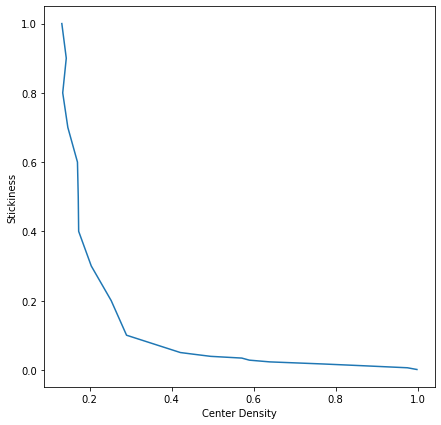

In [4]:
plt.figure(figsize=(7, 7))
plt.plot(results.center_density, results.stickiness)
plt.ylabel("Stickiness")
plt.xlabel("Center Density")

### Calculate Neighbor Strength

In [5]:
stickiness = []
avg_neighbor_strength = []

for file in onlyfiles:
    if '.npy' in file:
        dla_matrix = np.load(wdir+file)
        stickiness.append(file.split("_")[0])
        avg_neighbor_strength.append(getNeighborStrength(dla_matrix))

stickiness = [float("{0:.3f}". format(float(x))) for x in stickiness]

temp = pd.DataFrame(stickiness, columns=["stickiness"])
temp["average_neighbour_strength"] = avg_neighbor_strength
temp.sort_values("stickiness", inplace=True)

results["average_neighbour_strength"] = temp.average_neighbour_strength

Text(0.5, 0, 'Average Neighbor Strength')

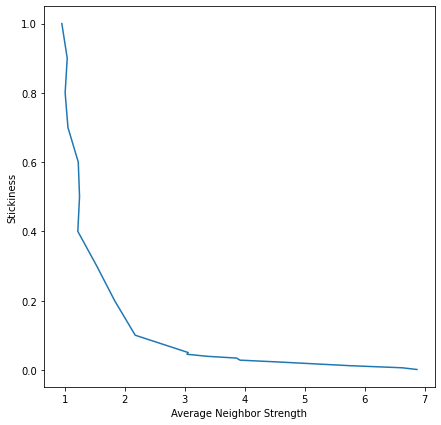

In [6]:
plt.figure(figsize=(7, 7))
plt.plot(results["average_neighbour_strength"], results.stickiness)
plt.ylabel("Stickiness")
plt.xlabel("Average Neighbor Strength")

In [7]:
results

,stickiness,center_density,average_neighbour_strength
19,0.001,0.998215,6.870080
1,0.006,0.975143,6.623360
16,0.012,0.864500,5.756992
13,0.017,0.768642,5.201728
2,0.023,0.639516,4.527808
0,0.028,0.589675,3.920064
5,0.034,0.571192,3.864000
6,0.039,0.495347,3.384448
17,0.045,0.454557,3.036288
8,0.050,0.421415,3.056512


### Polynomial Regression

In [150]:
order = 5

In [151]:
model_cd = np.poly1d(np.polyfit(results.center_density, results.stickiness, order))

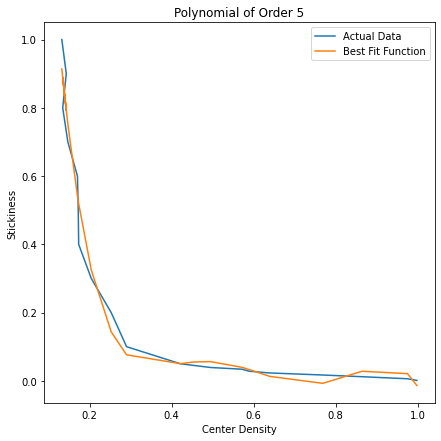

In [152]:
plt.figure(figsize=(7, 7))
plt.plot(results.center_density, results.stickiness, label='Actual Data')
plt.plot(results.center_density, model_cd(results.center_density), label='Best Fit Function')
plt.ylabel("Stickiness")
plt.xlabel("Center Density")
plt.legend(loc="upper right")
plt.title("Polynomial of Order " + str(order))
plt.savefig("./models/cd" + "_" + str(order) + ".png")

In [153]:
model_ns = np.poly1d(np.polyfit(results.average_neighbour_strength, results.stickiness, order))

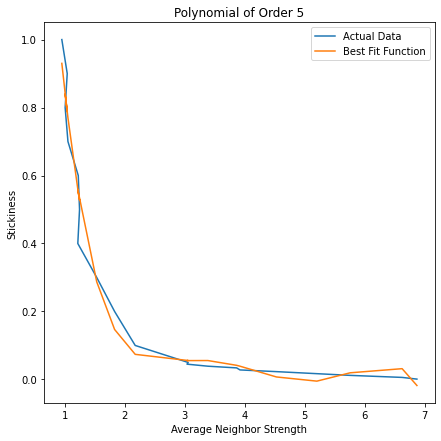

In [154]:
plt.figure(figsize=(7, 7))
plt.plot(results.average_neighbour_strength, results.stickiness, label='Actual Data')
plt.plot(results.average_neighbour_strength, model_ns(results.average_neighbour_strength), label='Best Fit Function')
plt.ylabel("Stickiness")
plt.xlabel("Average Neighbor Strength")
plt.legend(loc="upper right")
plt.title("Polynomial of Order " + str(order))
plt.title("Polynomial of Order " + str(order))
plt.savefig("./models/ns" + "_" + str(order) + ".png")

In [226]:
wdir = './test/'

onlyfiles = [f for f in listdir(wdir) if isfile(join(wdir, f))]

In [232]:
def get_stickiness(dla_matrix, area_cd=50, area_ns=0.5):
    
    cd, _ = center_density_cc(dla_matrix, area_cd)
    k_cd = model_cd(cd)
    
    k_ns = model_ns(getNeighborStrength(dla_matrix, area_ns))
    
    return k_cd, k_ns

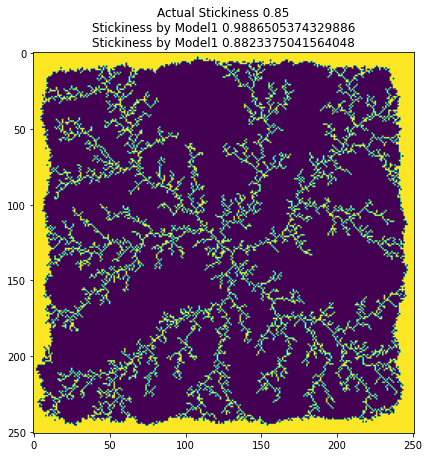

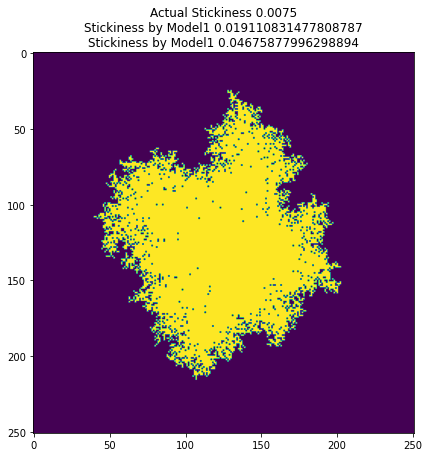

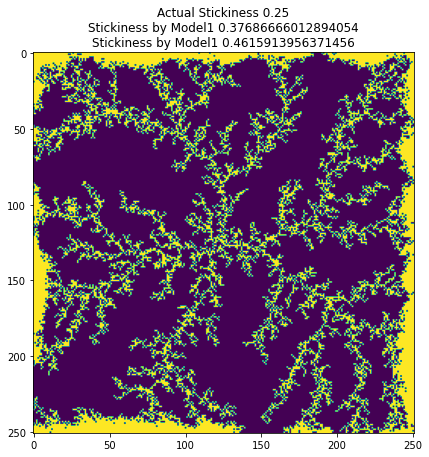

In [237]:
test_stickiness = []
test_dla = []

for file in onlyfiles:
    if '.npy' in file:
        test_stickiness.append(float(file.split("_")[0]))
        test_dla.append(np.load(wdir+file))

for i, dla in enumerate(test_dla):
    
    k_cd, k_ns = get_stickiness(dla)
    
    plt.figure(figsize=(7, 7))
    plt.imshow(dla)
    plt.title("Actual Stickiness " + str(test_stickiness[i]) + "\n" +\
              "Stickiness by Model1 " + str(k_cd) + "\n" +\
              "Stickiness by Model1 " + str(k_ns))
    